<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/book1/mlp/mlp_mnist_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP on (Fashion) MNIST using TF 2.0

In [1]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
try:
    import tensorflow as tf
except ModuleNotFoundError:
    %pip install tensorflow
    import tensorflow as tf
from tensorflow import keras

assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices("GPU"):
    print("No GPU was detected. DNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

In [2]:
# Standard Python libraries
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL

try:
    import imageio
except ModuleNotFoundError:
    %pip install imageio
    import imageio
from IPython import display
import sklearn
from time import time

np.random.seed(0)

try:
    from probml_utils.mnist_helper_tf import *
except ModuleNotFoundError:
    %pip install git+https://github.com/probml/probml-utils.git
    from probml_utils.mnist_helper_tf import *

(60000, 28, 28)


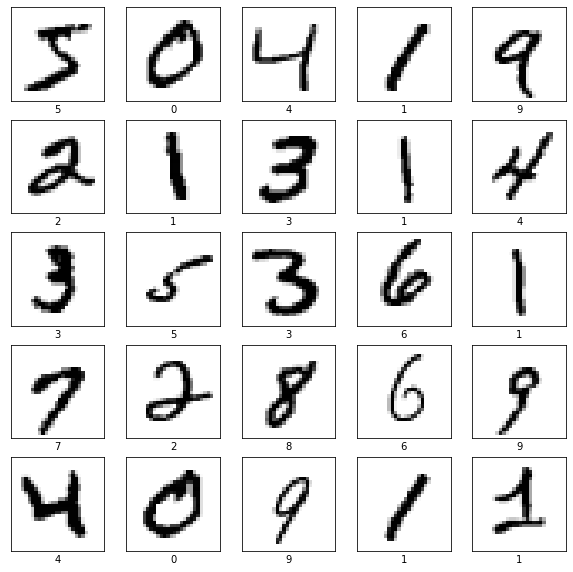

In [3]:
train_images, train_labels, test_images, test_labels, class_names = get_dataset(FASHION=False)
print(train_images.shape)
plot_dataset(train_images, train_labels, class_names)

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

model.summary()

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


# We just train for 1 epochs because (1) it is faster, and
# (2) it produces more errors, which makes for a more interesting plot :)
time_start = time()
model.fit(train_images, train_labels, epochs=1)
print("time spent training {:0.3f}".format(time() - time_start))

In [ ]:
# Overall accuracy
train_loss, train_acc = model.evaluate(train_images, train_labels)
print("Train accuracy:", train_acc)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

In [ ]:
# To apply prediction to a single image, we need to reshape to an (N,D,D) tensor
# where N=1
img = test_images[0]
img = np.expand_dims(img, 0)
print(img.shape)
predictions_single = model.predict(img)
print(predictions_single.shape)

In [ ]:
predictions = model.predict(test_images)
print(np.shape(predictions))
ndx = find_interesting_test_images(predictions, test_labels)
plot_interesting_test_results(test_images, test_labels, predictions, class_names, ndx)

In [ ]:
model_epoch = model  # save old model

# Train for 1 more epochs
time_start = time()
model.fit(train_images, train_labels, epochs=1)
print("time spent training {:0.3f}".format(time() - time_start))

In [ ]:
# Overall accuracy
train_loss, train_acc = model.evaluate(train_images, train_labels)
print("Train accuracy:", train_acc)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

In [ ]:
predictions = model.predict(test_images)
print(np.shape(predictions))
# test_ndx = find_interesting_test_images(predictions) # re-use old inddices
plot_interesting_test_results(predictions, test_ndx)